# Training a Support Vector Machine to Predict Position Salaries

By: Matt Purvis

This project will train a support vector machine to predict position salaries in order to help determine if a prospective employee is lying about their salary or not. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [21]:
filepath = 'C:\\Users\\v-mpurvis\\OneDrive\\Personal Files\\Python Machine Learning Examples\\DataSets-Modules\\'

dataset = pd.read_csv(filepath + 'Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


 # Scale the data

In [22]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


# Train the Model

In [23]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y.ravel())

SVR()

# Predict new values

In [24]:
predictions = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
predictions

array([170370.0204065])

# Visualize Levels and Predicted Salaries

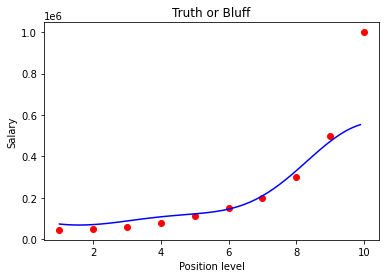

In [25]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()